# Analyse von Bundestagsreden<div class="tocSkip">

# Einleitung
Dieses Notebook wurde im Auftrag der _Bundeszentrale für politsche Bildung_ (bpb) erstellt. Die _bpb_ unterstützt die Bürger:innen von Deutschland dabei, sich mit Politik zu befassen. Ihre Aufgabe ist es, Verständnis für politische Sachverhalte zu fördern, das demokratische Bewusstsein zu festigen und die Bereitschaft zur politischen Mitarbeit zu stärken.[[1]](#Links)

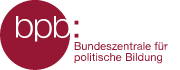

Die _bpb_ möchte eine neue Aufklärungskampagne mit dem leicht reißerischen Titel "Alles derselbe Brei" ins Leben rufen. Durch die in den letzten Jahren durchaus heftig geführten Debatten rund um das Thema "Distanz zwischen Poliik und Bürger:innen" will man mit dieser Kampagne zeigen, dass die deutsche Politik eben sehr vielfältig ist und nicht alle Partien gleich sind. Man will speziell die aktuelle Legislaturperiode (Nummer 19) analysieren, mit Aussicht auf weitere zukünftige Analysen sollten die Ergebnisse entsprechend aussagekräftig sein. 

## Problembeschreibung
Im Zuge der neuen Kampagne "Alles derselbe Brei", möchte die _bpb_ im Allgemeinen wissen, welche Themen den Bundestag bestimmen, wie sich die Parteien unterscheiden und welche Netzwerke existieren. Dazu sollen öffentlich zugängliche Daten herangezogen werden, in diesem Fall sollen die Reden aus den Sitzungen des Bundestag genommen werden. Konkret sollen folgende Fragen beantwortet werden:
* Welche Themen können aus den Reden abgeleitet werden?
* Welche Themen werden von welchen Parteien bearbeitet?
* Welche Netzwerke können aus den Reden abgeleitet werden?
* Kann man anhand der Rede bestimmen, welcher Partei der/die Redner:in angehört?
* Ist wirklich alles derselbe "Brei"?

## Vorgehensweise
Zunächst werden die Daten aus dem Internet extrahiert. Dazu verwenden wir die protokollierten Reden aus der Open Data Sektion[[2]](#Links) des Bundestags. Wir beschränken uns auf die Protokolle der 19. Wahlperiode (die aktuelle).

Nachdem die Daten extrahiert und in einer Datenbank abgespeichert wurden, müssen sie noch aufbereitet werden. Die aufbereiteten Daten werden ebenfalls in einer Datenbank abgespeichert. 

Mit den aufbereiteten Daten werden erste Analysen durchgeführt. Beispiele:
* Länge der Reden
* Häufigste Redner:innen
* Worthäufigkeiten
* Zeitliche Entwicklung der Reden

Zuletzt werden die Reden durch Machine-Learning-Analysen genauer betrachtet. Hier werden folgende Punkte bearbeitet:
* Vektorisierung
* Topic Modelling
* Netzwerk Analyse
* Klassifikation

# Datenextraktion und Aufbereitung
Schauen wir uns zunächst die Datenextraktion und deren Aufbereitung an.

## Scraping & Crawling
Um an Daten zu kommen, müssen zunächst Daten von der Website des Bundestags extrahiert werden. Die Daten selbst liegen in XML-Form vor. Um an diese XML-Dateien zu kommen, muss man einzelne Links anwählen und weiterklicken. Um das zu realisieren, wurde das Framework _Selenium_ zuhilfe genommen. Damit lassen sich per Code Klick-Events auslösen und somit alle URLs abgreifen. 

Eine Schwierigkeit bestand darin, dass die Seite genau die Links zu den XML-Dateien asynchron lädt. Das bedeutet, dass das reine HTML Dokument, welches beim ersten Aufruf der Seite geladen wird, noch gar keine URLs auf die Dateien enthält. Der _Crawler_ musste dementsprechend angepasst werden. 

Wurden die URLs entsprechend extrahiert und die XML-Dateien heruntergeladen, konnte der _Scraper_ seine Arbeit beginnen und die XML-Dateien auslesen. Die Daten werden dann als Dataframe in eine SQLite Datenbank geschrieben, damit sie später aufgearbeitet werden können. Zum entsprechenden Notebook geht es [hier](./notebooks/01-Web-Scraping-and-Crawling.ipynb).

## Textaufbereitung
Wenn die Daten dann endlich in einer Datenbank abgespeichert sind, können sie so aufbereitet werden, dass man mit ihnen arbeiten kann. Es wird zunächst analysiert, ob die Daten in irgendeiner Art und Weise korrumpiert sind, d.h. Zeichen enthalten, die kein "reiner" Text sind, wie z.B. "@". 

Mit Hilfe von sogenannten Stopwörtern werden dann Wörter aus dem Datensatz gefiltert, die keinerlei Informationsgehalt haben. Dadurch sind spätere Analysen einfacher. 

Im nächsten Schritt werden die ursprünglichen Texte auseinadergenommen und mittels NLP (Natural Language Processing) neue Spalten im Dataframe erstellt, um später zum Beispiel mit _Lemmas_ (Basiswörtern) oder _Nouns_ (Substantive) zu arbeiten. Zum Notebook geht es [hier](./notebooks/02-Text_Aufbereitung.ipynb).

# Explorative Datenanalyse
Kommen wir nun zur Datenanalyse.

## Analyse der Redner:innen und Reden
Zunächst werden wir uns den Redner:innen und den Reden selbst nähern. Folgendes wird bearbeitet: 
* Länge der Reden
* Anzahl der Reden
* Welche Redner:innen reden öfters in den gleichen Sitzungen? 

Zum Notebook geht es [hier](./notebooks/03-1-Explorative%20Datananalyse.ipynb).

## Analyse der Worthäufigkeiten
Schauen wir uns nun die Analysen auf die Worthäufigkeiten an. Wir gehen folgende Dinge an:
* Worthäufigkeiten über den gesamten Korpus
* Worthäufigkeiten nach Jahren
* Worthäufigkeiten nach Parteien

Zum Notebook geht es [hier](./notebooks/03-2-Explorative-Datenanalyse-Worthäufigkeiten.ipynb) (**ACHTUNG**: Dieses Notebook ist sehr groß und dauert lange, bis es geladen ist).

## Analyse der zeitlichen Entwicklung
Zuletzt noch die Analysen auf der Zeitebene. Hier schauen wir nach Auffälligkeiten in folgenden Belangen:
* Anzahl der Wörter pro Woche
* Anzahl der Reden pro Woche

Zum Notebook geht es [hier](./notebooks/03-3-Explorative%20Datenanalyse-Zeitlicher%20Verlauf.ipynb).

# Machine Learning Verfahren
Kommen wir nun zu den Machine Learning Verfahren. Hierbei werden statistische Modelle "trainiert", um Daten zu analysieren. Wir schauen uns insgesamt vier solcher Verfahren an. 

## Vektorisierung
Wir starten mit der Vektorisierung, was an und für sich kein Machine Learning Verfahren ist, sondern Teil des Prozesses im Machine Learning. In diesem Fall wurde aber eine Art Suchmaschine mittels Vektorisierung gebaut, anhand derer man nach bestimmten Begriffen im Datensatz suchen kann. Ausgabe der Suchebegriffe ist ein Balkendiagramm, welches aufzeigt, bei welchen Parteien diese Wörter am meisten benutzt werden. [Hier](./notebooks/04-Vektorisierung.ipynb) geht es zum Notebook.

## Topic Modelling
Als nächstes wird das Topic Modelling angegangen. Dabei werden anhand von statistischen Auffälligkeiten Themen ermittelt. Diese werden mit Hilfe von Word Clouds visualisert. Zum Notebook geht es [hier](./notebooks/05-Topic_analyse.ipynb) entlang.

## Netzwerk Analyse
Bei der Netzwerk Analyse wird versucht, anhand der Reden Netzwerke innerhalb des Bundestages zu ermitteln. Wer spricht häufiger über wen, welche Orte werden häufig in Verbindung mit anderen Orten genannt? Solche Überlegungen werden [hier](./notebooks/07-Netzwerk%20Analyse.ipynb) angegangen.

## Klassifikation
Die Klassifikation ist ein Klassiker im Machine Learning. Dabei soll das Modell bestimmen, zu welcher Partei eine Rede gehört. Wie genau das geht, lesen Sie [hier](./notebooks/06-ML_Methode_Klassifikation.ipynb).

# Fazit und Ausblick
Arbeiten mit Texten erweist sich oft als schwer. Sprache ist sehr vielfältig und niederschrieben fallen einfach sehr viele Aspekte weg. Wir konnten in unseren Nachforschungen allerdings einige interessante Dinge feststellen. 

So ist es tatsächlich möglich, anhand von Bundestagsreden bestimmte Themenschwerpunkte herauszufiltern. Sowohl beim Topic Modelling als auch bei der Suchmaschine war dies möglich. In der Datenanalyse war es nur begrenzt möglich, die Word Clouds den richtigen politschen Akteuren zuzuordnen. Dabei kam heraus, dass vor allem die Grünen sich deutlich von den anderen Parteien abheben. Dies ist vielleicht in möglicher Indikator für ihren derzeitigen Erfolg.

Schaut man sich die zeitliche Entwicklung bei den Reden an, so kann man herauslesen, dass im Laufe der Wahlperiode immer mehr Leute Reden in Sitzungen hielten. Am Anfang hielten weniger Leute längere reden, zuletzt waren es mehr Leute und dafür kürzere Reden. Man könnte also sagen, dass immer mehr Leute das Wort ergreifen können, was zu mehr Diveristät führen kann.

Obwohl es bei den Word Clouds durchaus "schwammig" zuging, konnte man bei der Analyse der Top-Redner:innen sehr gut deren Themenschwerpunkte herausarbeiten.

Der Vorwurf, im Bundestag wäre sowieso alles nur derselbe "Brei", lässt sich jedoch sehr gut bei der Klassifikation entkräftigen. Dort konnte gezeigt werden, dass man mit einer sehr hohen Wahrscheinlichkeit (mehr als 70%) unbekannte Reden den jeweiligen Parteien zuordnen konnte. 

Es ist außerdem tatsächlich möglich, nur anhand der Reden Netzwerke abzubilden, die einen Sinn ergeben. Das bedeutet, dass man tatsächlich anhand von Text herausarbeiten kann, wer welche Themen bearbeitet und welche Orte häufiger mit anderen genannt werden. Das sind durchaus sehr interessante Ergebnisse, das man daran erkennt, dass im Bundestag tatsächlich sehr viele Themen behandelt werden und es bei den Parteien immer auch entsprechende Akteure gibt, die sich diesen Themen annhemen, bspw. sind Jens Spahn und Karl Lauterbach in einer engen Verbindung angezeigt worden, was mit der Realität gut harmoniert, da beide in der Gesundheitspolitik unterwegs sind. 

Eine Schwierigkeit bei den Reden des Bundestags ist, dass auch die Sitzungsleitung mit zu den Reden gezählt wird. Das führte dazu, dass immer wieder Wörter in den Word Clouds auftauchten, die aus der Reihe fielen und dennoch sehr groß angezeigt wurden. Das lag dann daran, dass häufig nach den Reden dieser einen Person/Partei eine andere Person/Partei kam. Dies wiederum wurde häufig als Kommentar in den Reden festgehalten, ungefährt so:
> "[...] und jetzt spricht Herr/Frau Müller von der Partei XYZ"

Das hat jetzt nicht wirklich einen Informationswert für die Themen, ist jedoch auch wiederum sehr interessant, da man daran erkennen kann, wer häufig nach wem spricht. 

Es kamen allerdigs auch problematische Dinge zum Vorschein. So kam in der Analyse der Worthäufigkeiten heraus, dass die größeren Themen Rechtsextremismus und Klima (im Gesamtkontext) so gut wie gar nicht auftreten. Themen wie die Pandemie kamen jedoch gut zum Vorschein. Wahrscheinlich liegt es daran, dass die einzelnen Parteien diese Themen sehr unterschiedlich gewichten, während es bei der Pandemie (fast) einen parlamentarischen Konsens gibt, dass diese Krise überwunden werden muss. 

Als Grundaussage für die Kampagne "Alles derselbe Brei" kann man festhalten, dass das in der Einfachheit nicht stimmt, da man mit relativ einfachen statistischen Modellen schon zwischen den verschiedenen politischen Akteuren unterscheiden kann. Da die Analyse und Rechnungen durchaus Ergebnisse produzierten, raten wir dazu, weitere Analysen in Auftrag zu geben um auch längere Zeiträume mit in die Ergebnisse mit aufnehmen zu können. Interessant wären auch Analysen von Machtwechseln in der Regierung, als Beispiel die Jahre unter Gerhard Schröder und dann unter Angela Merkel an der Spitze dieses Landes. Die Daten bieten auf jeden Fall viel Potenzial und lassen sich gut auswerten.

# Literatur und Links

## Literatur
* Albrecht, Ramachandran, Winkler - Blueprints for Text Analytics Using Python: Machine Learning-Based Solutions for Common Real World (NLP) Applications (2020)

## Links
1. [Bundeszentrale für politische Bildung](https://www.bpb.de/die-bpb/) 
2. [Open Data Sektion des Bundestags](https://www.bundestag.de/services/opendata)
3. [Vorlesungsrepository TXA J. Albrecht](https://git.informatik.fh-nuernberg.de/albrecht-text-analytics/sose2021/00-vorlesung)
4. [Python 3.8 Docs](https://docs.python.org/3.8/library/index.html)
5. [Pandas API Reference](https://pandas.pydata.org/docs/reference/index.html#api)
6. [SpaCy API Docs](https://spacy.io/api)
7. [Plotly Docs](https://plotly.com/python/)
8. [NetworkX Docs](https://networkx.org/)
9. [Selenium Docs](https://www.selenium.dev/documentation/en/)
10. [BeautifulSoup Docs](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
11. [SciKit-Learn](https://scikit-learn.org/stable/)